In [1]:
import pandas as pd

In [2]:
# Import the data

df_full = pd.read_csv("/Users/parinazfathi/Documents/GitHub/ErdosFall2024ProteinProfiles/Combined_df2_imputedMean.csv")

In [3]:
# Check how many rows the dataframe has
len(df_full)

1905

In [4]:
# Check how many different groups there are

set(df_full['Cancer'])

{'AML',
 'BRC',
 'CLL',
 'CRC',
 'CVX',
 'Ctrl',
 'ENDC',
 'ESO',
 'GLIOM',
 'HODG',
 'LUNGC',
 'LYMPH',
 'MYEL',
 'OVC',
 'PRC'}

In [5]:
# Combine all the blood cancers into one category
df_bloodcombined = df_full.copy(deep = True)
df_bloodcombined=df_bloodcombined.replace(to_replace = ['AML', 'CLL', 'LYMPH', 'MYEL'], value = 'BLOOD' )

In [6]:
# Verify that the groups were combined as expected
set(df_bloodcombined['Cancer'])

{'BLOOD',
 'BRC',
 'CRC',
 'CVX',
 'Ctrl',
 'ENDC',
 'ESO',
 'GLIOM',
 'HODG',
 'LUNGC',
 'OVC',
 'PRC'}

In [7]:
# Specify the protein list 
proteins=df_bloodcombined.columns[5:]
# Check that we have the right number of proteins
len(proteins)

49

In [8]:
df_bloodcombined.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Sample_ID,Cancer,Q15389,P29965,P49763,Q02763,P01127,...,P09382,Q16790,P26842,P14210,P43489,O75144,O43927,P32970,Q8WXI7,P10144
0,0,0,0.0,PM910,Ctrl,10.12895,5.62622,7.72902,8.47530,10.08926,...,8.54519,4.20874,10.61404,8.37166,4.99296,7.78219,7.03584,4.81481,3.58965,4.13563
1,1,1,1.0,PM396,Ctrl,8.67289,5.18821,8.25523,9.06271,8.89866,...,8.25401,3.46839,10.77271,8.36820,4.92422,7.47997,8.05700,3.98900,4.78155,3.14840
2,2,2,2.0,PM190,Ctrl,9.99567,6.38876,8.44263,8.42102,10.08508,...,8.75887,4.65936,11.03062,9.18464,5.60743,7.92803,8.77261,4.80189,5.16350,4.29062
3,3,3,3.0,PM270,Ctrl,8.26407,5.06228,8.13429,8.66165,8.75925,...,8.75741,4.44633,10.47952,8.65548,5.54289,9.29458,8.64028,4.04045,5.59217,3.75295
4,4,4,4.0,PM656,Ctrl,9.08833,5.95005,8.37830,8.29127,9.43936,...,8.48018,3.81634,10.59295,8.63758,5.16271,7.41098,8.29143,4.59594,4.91665,4.10381


In [9]:
# One-hot encode the cancer types

df_bloodcombined = pd.get_dummies(df_bloodcombined, columns=['Cancer'])
one_hot_columns = [col for col in df_bloodcombined.columns if col.startswith('Cancer_')]
df_bloodcombined[one_hot_columns] = df_bloodcombined[one_hot_columns].astype(int)


In [10]:
df_bloodcombined.head(15)

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Sample_ID,Q15389,P29965,P49763,Q02763,P01127,P09341,...,Cancer_CRC,Cancer_CVX,Cancer_Ctrl,Cancer_ENDC,Cancer_ESO,Cancer_GLIOM,Cancer_HODG,Cancer_LUNGC,Cancer_OVC,Cancer_PRC
0,0,0,0.0,PM910,10.12895,5.62622,7.72902,8.47530,10.08926,10.58751,...,0,0,1,0,0,0,0,0,0,0
1,1,1,1.0,PM396,8.67289,5.18821,8.25523,9.06271,8.89866,9.22360,...,0,0,1,0,0,0,0,0,0,0
2,2,2,2.0,PM190,9.99567,6.38876,8.44263,8.42102,10.08508,10.43894,...,0,0,1,0,0,0,0,0,0,0
3,3,3,3.0,PM270,8.26407,5.06228,8.13429,8.66165,8.75925,9.24310,...,0,0,1,0,0,0,0,0,0,0
4,4,4,4.0,PM656,9.08833,5.95005,8.37830,8.29127,9.43936,9.83732,...,0,0,1,0,0,0,0,0,0,0
5,5,5,5.0,PM736,8.64457,5.79507,8.27732,8.37578,8.60373,9.03092,...,0,0,1,0,0,0,0,0,0,0
6,6,6,6.0,PM842,10.06218,5.06380,7.74244,8.41381,9.86604,10.05079,...,0,0,1,0,0,0,0,0,0,0
7,7,7,7.0,PM767,9.86577,7.30840,8.29889,8.60954,11.17774,10.68756,...,0,0,1,0,0,0,0,0,0,0
8,8,8,8.0,PM1497,8.37279,5.91951,8.51155,8.31815,8.95261,9.10530,...,0,0,1,0,0,0,0,0,0,0
9,9,9,9.0,PM746,10.34566,5.71417,8.05251,8.38463,10.61735,10.44890,...,0,0,1,0,0,0,0,0,0,0


In [11]:
# Split the data into X and y
X = df_bloodcombined[proteins]
y = df_bloodcombined[one_hot_columns]

In [12]:
X.head()

,Q15389,P29965,P49763,Q02763,P01127,P09341,O00182,Q14116,P09601,Q92583,...,P09382,Q16790,P26842,P14210,P43489,O75144,O43927,P32970,Q8WXI7,P10144
0,10.12895,5.62622,7.72902,8.47530,10.08926,10.58751,8.65712,7.81074,11.03461,8.07038,...,8.54519,4.20874,10.61404,8.37166,4.99296,7.78219,7.03584,4.81481,3.58965,4.13563
1,8.67289,5.18821,8.25523,9.06271,8.89866,9.22360,8.46706,8.18828,11.91449,8.15394,...,8.25401,3.46839,10.77271,8.36820,4.92422,7.47997,8.05700,3.98900,4.78155,3.14840
2,9.99567,6.38876,8.44263,8.42102,10.08508,10.43894,9.09830,9.15899,11.66469,8.58580,...,8.75887,4.65936,11.03062,9.18464,5.60743,7.92803,8.77261,4.80189,5.16350,4.29062
3,8.26407,5.06228,8.13429,8.66165,8.75925,9.24310,8.72250,8.57028,11.16933,7.91727,...,8.75741,4.44633,10.47952,8.65548,5.54289,9.29458,8.64028,4.04045,5.59217,3.75295
4,9.08833,5.95005,8.37830,8.29127,9.43936,9.83732,8.80904,8.18094,11.81232,7.69365,...,8.48018,3.81634,10.59295,8.63758,5.16271,7.41098,8.29143,4.59594,4.91665,4.10381


In [13]:
# Split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True, stratify = y, test_size=0.2, random_state=100)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score



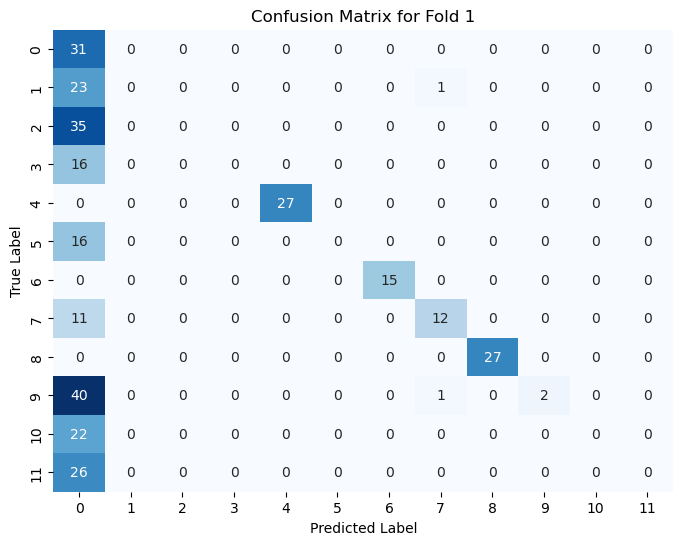

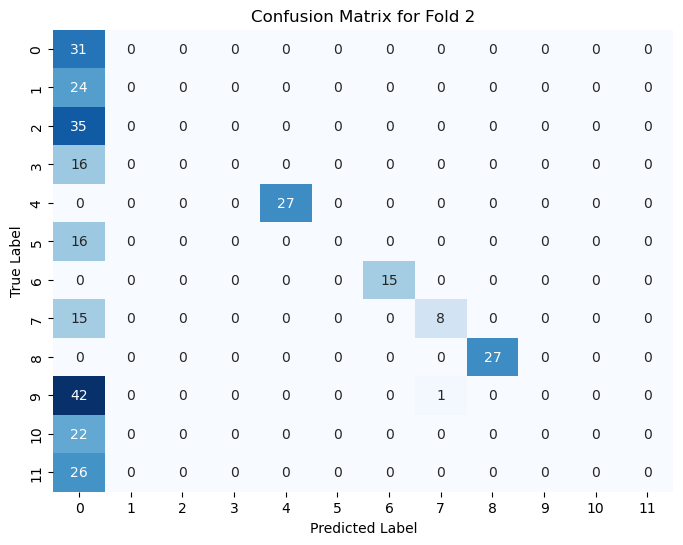

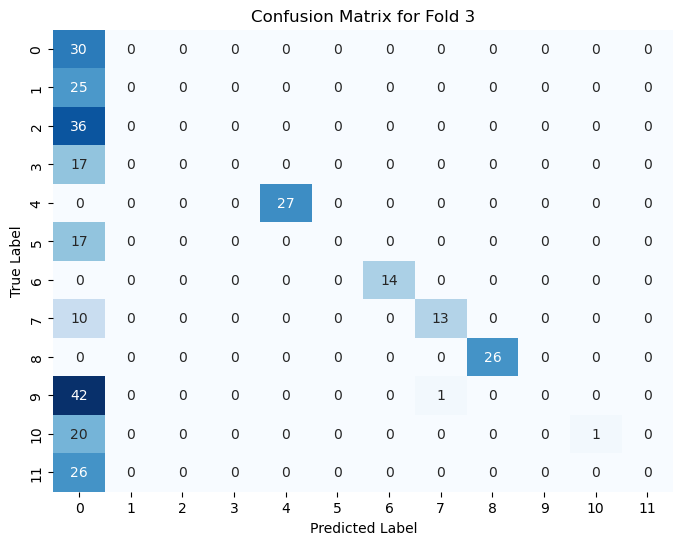

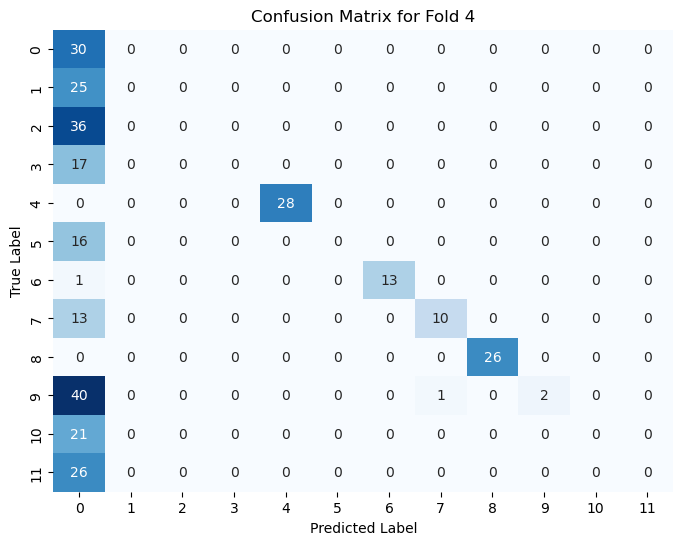

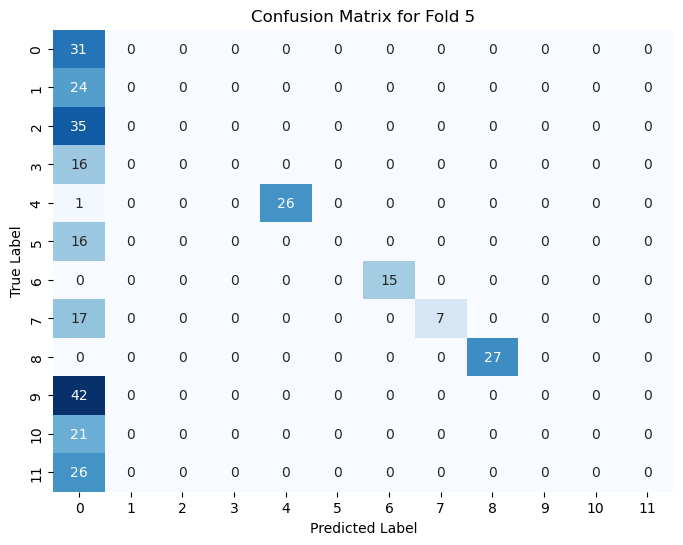

Cross-validation accuracy scores for each fold: [0.28524590163934427, 0.29180327868852457, 0.3016393442622951, 0.2819672131147541, 0.2631578947368421]
Mean accuracy: 0.284762726488352
Standard deviation of accuracy: 0.01272168786781596


In [15]:
# Define the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling (optional for RF)
    ('rf', RandomForestClassifier(random_state=100, max_depth=8, min_samples_split=6, min_samples_leaf=4))
])

# Define 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

# Store accuracy scores for each fold
accuracy_scores = []

# Cross-validation loop using X_train and y_train (one-hot encoded)
for fold, (train_idx, test_idx) in enumerate(cv.split(X_train, np.argmax(y_train, axis=1)), 1):
    X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
    y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]
    
    # Fit the pipeline on the training data of the current fold
    pipeline.fit(X_train_fold, y_train_fold)
    
    # Predict on the test data of the current fold
    y_pred = pipeline.predict(X_test_fold)
    
    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test_fold, y_pred)
    accuracy_scores.append(accuracy)
    
    # Generate confusion matrix
    cm = confusion_matrix(np.argmax(y_test_fold, axis=1), np.argmax(y_pred, axis=1))
    
    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=np.unique(np.argmax(y_train, axis=1)), 
                yticklabels=np.unique(np.argmax(y_train, axis=1)))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix for Fold {fold}")
    plt.show()

# Print overall cross-validation results
print("Cross-validation accuracy scores for each fold:", accuracy_scores)
print("Mean accuracy:", np.mean(accuracy_scores))
print("Standard deviation of accuracy:", np.std(accuracy_scores))

GOING BASED ON NIHAN'S CODE

In [16]:
# define the dataframe as Nihan did
df = df_bloodcombined.copy(deep=True) 
df = df.drop(columns=['Unnamed: 0.2' , 'Unnamed: 0.1', 'Unnamed: 0'])

In [17]:
df.head(15)

,Sample_ID,Q15389,P29965,P49763,Q02763,P01127,P09341,O00182,Q14116,P09601,...,Cancer_CRC,Cancer_CVX,Cancer_Ctrl,Cancer_ENDC,Cancer_ESO,Cancer_GLIOM,Cancer_HODG,Cancer_LUNGC,Cancer_OVC,Cancer_PRC
0,PM910,10.12895,5.62622,7.72902,8.47530,10.08926,10.58751,8.65712,7.81074,11.03461,...,0,0,1,0,0,0,0,0,0,0
1,PM396,8.67289,5.18821,8.25523,9.06271,8.89866,9.22360,8.46706,8.18828,11.91449,...,0,0,1,0,0,0,0,0,0,0
2,PM190,9.99567,6.38876,8.44263,8.42102,10.08508,10.43894,9.09830,9.15899,11.66469,...,0,0,1,0,0,0,0,0,0,0
3,PM270,8.26407,5.06228,8.13429,8.66165,8.75925,9.24310,8.72250,8.57028,11.16933,...,0,0,1,0,0,0,0,0,0,0
4,PM656,9.08833,5.95005,8.37830,8.29127,9.43936,9.83732,8.80904,8.18094,11.81232,...,0,0,1,0,0,0,0,0,0,0
5,PM736,8.64457,5.79507,8.27732,8.37578,8.60373,9.03092,8.73985,8.95415,11.84584,...,0,0,1,0,0,0,0,0,0,0
6,PM842,10.06218,5.06380,7.74244,8.41381,9.86604,10.05079,8.80398,8.97160,11.77272,...,0,0,1,0,0,0,0,0,0,0
7,PM767,9.86577,7.30840,8.29889,8.60954,11.17774,10.68756,8.88648,8.82912,11.66154,...,0,0,1,0,0,0,0,0,0,0
8,PM1497,8.37279,5.91951,8.51155,8.31815,8.95261,9.10530,9.15699,8.63660,11.72280,...,0,0,1,0,0,0,0,0,0,0
9,PM746,10.34566,5.71417,8.05251,8.38463,10.61735,10.44890,9.02099,8.62020,12.12357,...,0,0,1,0,0,0,0,0,0,0


In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import the packages we may need
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from seaborn import set_style
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_selection import RFECV 

# Assuming df, proteins, and other variables are defined

# Initialize accuracy scores array and dictionaries for feature importances and protein counts
accuracy_scores = np.zeros((10, 2))  # Stores cross-validation scores for RF and ET
feature_importance_dict = {}  # To store feature importances for each cancer type
protein_counts = {protein: 0 for protein in proteins}  # Count occurrences of each protein

# Cross-validation folds
cv_folds = 5
train_accuracies = []
val_accuracies = []

# Loop over each target (assuming the target columns start from index 51)
for i in range(10):
    smote = SMOTE(random_state=100)
    
    # Train-test split for each target (target column at index 51 + i)
    df_train, df_test = train_test_split(df,
                                         shuffle=True,
                                         random_state=100,
                                         test_size=0.2,
                                         stratify=df.iloc[:, (51 + i)])

    # Fit and resample using SMOTE
    resampled_X, resample_y = smote.fit_resample(df_train[proteins], df_train.iloc[:, (51 + i)])

    # Create StratifiedKFold cross-validation split to ensure balanced splits
    kf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=100)
    
    # Create pipelines for RandomForest and ExtraTrees models with regularization to reduce overfitting
    rf_pip = Pipeline([
        ("scale", StandardScaler()), 
        ("rf", RandomForestClassifier(random_state=100, max_depth=8, min_samples_split=6, min_samples_leaf=4))
    ])
    et_pip = Pipeline([
        ("scale", StandardScaler()), 
        ("et", ExtraTreesClassifier(random_state=100, max_depth=8, min_samples_split=6, min_samples_leaf=4))
    ])

    # Perform k-fold cross-validation and calculate accuracy
    rf_cv_scores = cross_val_score(rf_pip, resampled_X, resample_y, cv=kf, scoring='accuracy')
    et_cv_scores = cross_val_score(et_pip, resampled_X, resample_y, cv=kf, scoring='accuracy')

    accuracy_scores[i, 0] = rf_cv_scores.mean()  # RandomForest mean accuracy
    accuracy_scores[i, 1] = et_cv_scores.mean()  # ExtraTrees mean accuracy

    # Collecting training and validation accuracies across folds
    fold_train_accuracies = []
    fold_val_accuracies = []
    y_true = []  # True labels for validation
    y_pred = []  # Predicted labels for validation
    
    for train_index, val_index in kf.split(resampled_X, resample_y):
        # Split the data into training and validation sets
        X_train, X_val = resampled_X.iloc[train_index], resampled_X.iloc[val_index]
        y_train, y_val = resample_y.iloc[train_index], resample_y.iloc[val_index]
        
        # Train the model on the training fold
        rf_pip.fit(X_train, y_train)
        
        # Predict on the validation fold
        predictions = rf_pip.predict(X_val)
        y_true.extend(y_val)
        y_pred.extend(predictions)
        
        # Calculate fold-wise accuracies
        fold_train_accuracies.append(accuracy_score(y_train, rf_pip.predict(X_train)))
        fold_val_accuracies.append(accuracy_score(y_val, predictions))
    
    # Store mean accuracies across folds
    train_accuracies.append(np.mean(fold_train_accuracies))
    val_accuracies.append(np.mean(fold_val_accuracies))
    
    # Get feature importances from the fitted RandomForest model
    rf_pip.fit(resampled_X, resample_y)
    feature_importances = rf_pip.named_steps['rf'].feature_importances_

    # Rank features based on their importance
    ranked_importances = pd.Series(feature_importances, index=proteins).sort_values(ascending=False)

    # Store the ranked features in the dictionary
    feature_importance_dict[df.columns[51 + i]] = ranked_importances.index.tolist()
    
    # Count occurrences of each protein based on importance ranking
    for protein in ranked_importances.index:
        protein_counts[protein] += 1
 

In [19]:
# Print mean accuracy scores for both models
print("Random Forest Mean Accuracy-CV: ", np.mean(accuracy_scores[:, 0]))
print("Extra Trees Mean Accuracy-CV: ", np.mean(accuracy_scores[:, 1]))

# Optionally, print the accuracy scores for each cancer type
label = df.columns[51:]

report = pd.DataFrame(accuracy_scores, columns=["Random Forest-CV", "Extra Trees-CV"])
report.insert(0, "target", label)
report

Random Forest Mean Accuracy-CV:  0.9562342326039012
Extra Trees Mean Accuracy-CV:  0.9187860967322419


ValueError: Length of values (11) does not match length of index (10)